# <span style="color:darkblue"> QTM 151 - Final Project </span>

# Introduction

Formula-1 Race is the most renowned and popular vehicle race around the world. According to an official introduction video, drivers from all around the world will compete in several preset locations’ Grand Prix by driving their auto for a specific number of laps around the track. Prior to the formal competition, the drivers would be ranked by qualifying the time completing a certain number of laps, and the lower the time spent, the more forward the corresponding driver would start the formal race. In each Grand Prix, the drivers are assigned points based on their rankings, and the driver who acquires the most total points in all the Grand Prixs in the season will win the championship.

This project explores the relationship between the place of the competition and the performance of drivers. Specifically, we are trying to summarize how the altitude of the race circuits would affect the fastest speed of drivers during that race. The conditions of air concentration, temperature, and basic rock formations might differ between tracks at different altitudes, so drivers may need to adjust modes or control their average and maximum speed in the race so that the engines would not be overly damaged and they would not have to stop for repairs too much. Additionally, the vehicle producers would also need such information so they can specifically design the vehicles for different tracks and different drivers. 


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

# Data Description

## Datasets Used
In this project, we used three datasets out of the 14: “circuits.csv”, “races.csv”, and “results.csv”. Specifically, “circults.csv” documents the name of the tracks for racing, their location, countries and cities, longitudes, latitudes, and altitude information. A total of 79 tracks are recorded in the file. The “races.csv” file records all the Grand Prixs between 2009 and 2023, inclusive. A total of 1120 Grand Prixs were performed during that period of time, the number of rounds each year varying from 16 to 23. The “circultId” column denotes the track where each round of competition is located, and the date and starting time of the races are recorded in the preceding columns. The “results.csv” is linked to a number of other tables to store the results of each round of the races. “resultId” is an integer that serves as the primary key for the table, while the “raceId”, “driverId”, “constructorId”, and “statusId” are foreign keys that link this table to the races, drivers, constructors, and status tables. “Number” is the driver’s number, and “grid” is an integer that represents each driver’s starting location. “Position”, “positionText”, and “positionOrder” are stored as different types of variables, but they all denote the drivers’ positions. “Points” stores the points that each driver earns in a certain race, which is also related to the drivers’ rankings stored in the “rank” column. “Time” and “milliseconds” both represent the finishing time, but they are stored as different types of variables. “Laps” records the total number of laps completed by each driver, and “fastestLap” stores in which lap does each driver complete the fastest. Finally, “fastestLapTime” and “fastestLapSpeed” denote the amount of time spent on the fastest lap and the running speed, respectively. In the results table, a total of 25845 observations are recorded.

In [9]:
circuits = pd.read_csv("data_raw/circuits.csv")
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv")

# clean + merge

## Data Cleaning
In this project, we are working with three datasets: races, circuits, and results. We want to have alt from circuits and fastestLapSpeed from results in the same table so we can explore the relationship between the altitude of the competition location and the performance of drivers measured by fastest Lap speed.
 
First, using the str.isnumeric() method, we create a subset of the results dataset that contains only the rows where the value is not numeric and print the unique non-numeric values out. Then we clean the alt column of the circuits dataset by replacing the \\N and -7 values with NaN (Not a Number), which is a special value in pandas that represents missing or undefined data, and -7, respectively. 
The resulting cleaned column is saved as “alt_numeric”. 



Then, we clean the fastestLapSpeed column of the result dataset using the same procedure other than directly replacing \\N with NaN in the column. As we convert the fastestLapSpeed column to a numeric data type, we save the resulting cleaned column as “fastestLapSpeed_numeric”.


By cleaning the circuits and fastestLapSpeed dataset in this way, we ensure that the resulting merged dataset contains accurate and consistent data that can be used for analysis and modeling. 

In [37]:
# clean alt
circuits["alt"].str.isnumeric()
subset      = circuits.query("alt.str.isnumeric() == False")
list_unique = pd.unique(subset["alt"])
print(list_unique)
list_old = ['\\N','-7']
list_new = [np.nan,-7]
circuits["alt"] = circuits["alt"].replace(list_old, list_new)
circuits["alt_numeric"] = pd.to_numeric(circuits["alt"])


# clean lapspeed
results["fastestLapSpeed"].str.isnumeric()
subset2      = results.query("fastestLapSpeed.str.isnumeric() == False")
list_unique = pd.unique(subset2["fastestLapSpeed"])
print(list_unique)
results['fastestLapSpeed'] = results['fastestLapSpeed'].replace('\\N', np.nan)
results["fastestLapSpeed_numeric"] = pd.to_numeric(results["fastestLapSpeed"])

[]
['218.300' '217.586' '216.719' ... '211.632' '208.556' '209.889']



## Merging Tables
We needed to include two cleaned data columns in the merged dataset. Since the alt column is present in the circuits dataset and the fastestLapSpeed column is present in the results dataset, we first need to merge the circuits and results datasets with the races dataset on the circuitId and raceId columns respectively, to obtain a single DataFrame with all the relevant columns. 

First, we merge the races dataset with the circuits dataset on the circuitId column using a left join, and the resulting merged dataset is stored in a new DataFrame called race_with_alt_clean. Then, we merge the results dataset with the race_with_alt_clean DataFrame on the raceId column using a left join, and the resulting merged dataset is stored in a new DataFrame called data_merge. This merged DataFrame contains the necessary information to explore the relationship between the altitude of the circuit where a race was held and the fastest lap speed recorded during the race.


In [10]:
# merge
results["fastestLapSpeed_numeric"].mean()
race_with_alt_clean = pd.merge(races,
                      circuits[["circuitId","alt_numeric"]],
                        on = "circuitId",
                        how = "left")


data_merge   = pd.merge(race_with_alt_clean,
                      results[["raceId","fastestLapSpeed_numeric"]],
                        on = "raceId",
                        how = "left")


['\\N' '-7']
['218.300' '217.586' '216.719' ... '211.632' '208.556' '209.889']


# Main Columns Used

# Compute

,mean_fastestLapSpeed,median_fastestLapSpeed,std_fastestLapSpeed
bins_alt,,,
less than 0,197.247349,199.6540,8.804440
Between 0 and 50,195.402612,200.5935,21.580479
Between 50 and 100,NaN,NaN,NaN
Between 100 and 150,204.482128,206.5600,11.341499
Between 150 and 200,223.523929,226.9060,19.603777
Between 200 and 250,203.902916,204.5680,9.142384
Between 250 and 300,188.403188,189.2690,12.300952
Between 300 and 350,NaN,NaN,NaN
Between 350 and 400,NaN,NaN,NaN


203.08921412115313

204.291

21.35687608030935

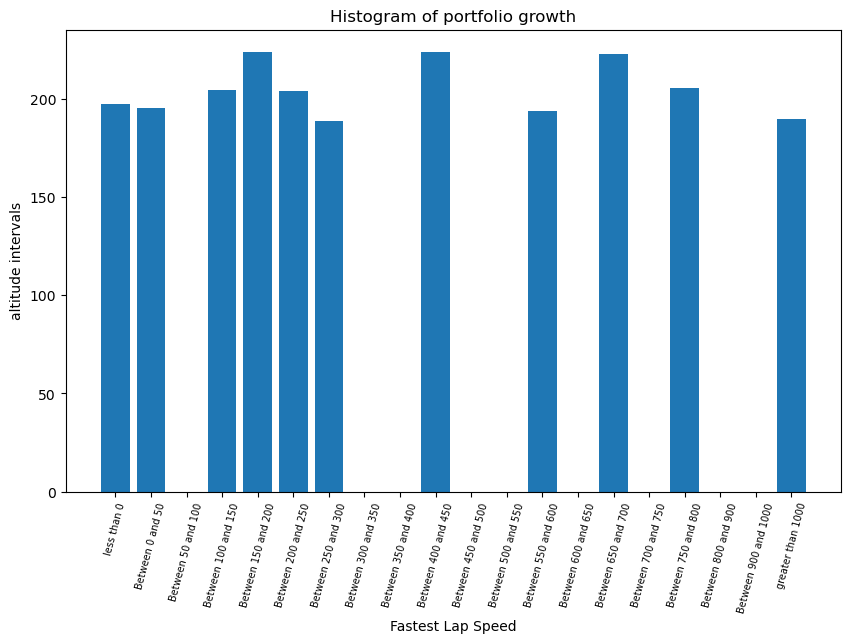

In [36]:
bins_alt = [float('-inf'),0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000, float('inf')]
labels_alt = ["less than 0",
            "Between 0 and 50",
            "Between 50 and 100",
            "Between 100 and 150",
            "Between 150 and 200",
            "Between 200 and 250",
            "Between 250 and 300",
            "Between 300 and 350",
            "Between 350 and 400",
            "Between 400 and 450",
            "Between 450 and 500",
            "Between 500 and 550",
            "Between 550 and 600",
            "Between 600 and 650",
            "Between 650 and 700",
            "Between 700 and 750",
            "Between 750 and 800",
            "Between 800 and 900",
            "Between 900 and 1000",
            "greater than 1000"]
           

data_merge["bins_alt"] = pd.cut(data_merge["alt_numeric"],
                              bins = bins_alt,
                              right = True,
                              labels = labels_alt)



## descriptive statistics/result table
table = data_merge.groupby("bins_alt").agg(mean_fastestLapSpeed = ('fastestLapSpeed_numeric', 'mean'),
                                           median_fastestLapSpeed = ('fastestLapSpeed_numeric', 'median'),
                                           std_fastestLapSpeed = ('fastestLapSpeed_numeric', 'std'))

display(table)

display(data_merge["fastestLapSpeed_numeric"].mean())
display(data_merge["fastestLapSpeed_numeric"].median())
display(data_merge["fastestLapSpeed_numeric"].std())


#graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels_alt, table["mean_fastestLapSpeed"])
ax.set_ylabel("altitude intervals")
ax.set_xlabel("Fastest Lap Speed")
ax.set_title("Histogram of portfolio growth")

ax.xaxis.set_tick_params(labelsize = 7,
                         rotation=75)


The mean value of the fastest speed of all recorded drivers' races is roughly 203.089. Among the bins of the altitude ranges, "between 150 and 200", "between 400 and 450", and "between 650 and 700" have a significantly higher mean value than the entire dataset with an average fastest speed of over 220. In tracks with altitudes "less than 0", "between 0 and 50", "between 250 and 300", "between 550 and 600", and "greater than 1000", the average fastest speed were below 200. The remaining bins with meaningful values have similar average fastest speeds with the entire dataset. The fastest speed in a race seems to be somewhat related to the altitude, although the specific relationship could not be accurately determined.

The median fastest speed of the entire dataset is 204.291, and it is not significantly different from the population mean. Within each bin, the medians also closely align with mean values.

The standard deviation of the fastest speed of the entire dataset is roughly 21.3569, and non of the bins has an average that is larger or smaller than the population mean by larger than one standard deviation, not to mention two standard deviation. Hence, the data seems fairly concentrated.

Text(0, 0.5, 'frequency')

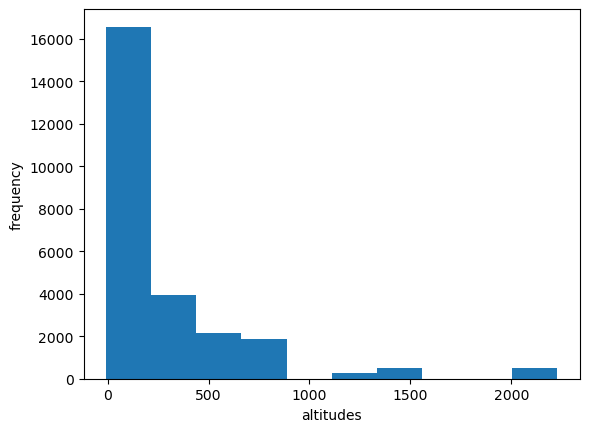

In [12]:
plt.hist(x = data_merge["alt_numeric"])
plt.xlabel("altitudes")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

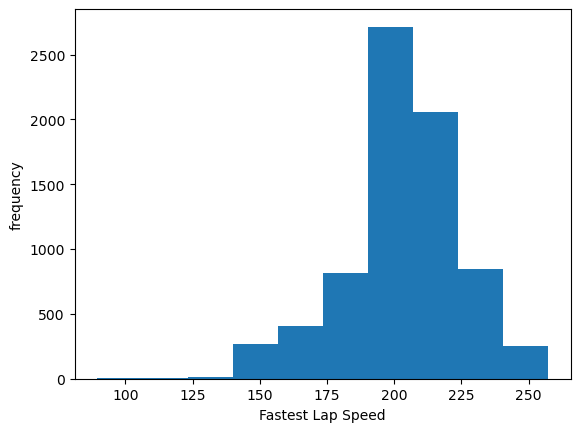

In [13]:
plt.hist(x = data_merge["fastestLapSpeed_numeric"])
plt.xlabel("Fastest Lap Speed")
plt.ylabel("frequency")

From the histograms above, we can clearly see that most Grand Prixs are held in low-altitude locations, with over 20000 observations being recorded at tracks of an altitude that is lower than 500, and most of the fastest speed data are located somewhere between 175 and 240. THe distribution of the fastest speeds are centered around the mean value of 203.089, but it is hard to detect any relationship between the mean value of the fastest speed within each latitude bin and its corresponding standard deviation because the sample size of each altitude bin varies sharply, creating huge discrepancies in the standard deviation, even if the mean values are close.

# Results
The results are shown in the table and plot below. The average fastest speed is the highest in the altitude bins of 150-200, 450-500, and 650-700. There seems to be a gradual increase in the fastest speed between altitudes from less than zero and 200, a gradual decline between 200 and 300, and another major decline trend for altitudes higher than 700. However, we failed to discover a linear relationship between the altitude and the fastest speed. To further explore their relationships, some types of piecewise interpolation and extrapolation might be necessary.

# Conclusion and Future Work
It is concluded that there is not a linear relationship between the fastest speed in a race and the altitude of the track, although there were some trends within the subsectors of altitudes. A number of factors could have contributed to the inconclusive result: firstly, there are too many other relevant variables like the type of the vehicle and drivers’ competition styles that are present to be controlled; secondly, there are very limited tracks for the Grand Prixs; and thirdly, even if there is a correlation, it still could not imply causal relationship. For future work, it is suggested that more multivariable linear or quadratic regressions should be done to determine how each factor affects the fastest speed, and how much they are related via the R-squared statistics.